# Chatbot
- [reference] https://python.langchain.com/v0.2/docs/tutorials/chatbot/


## Quickstart

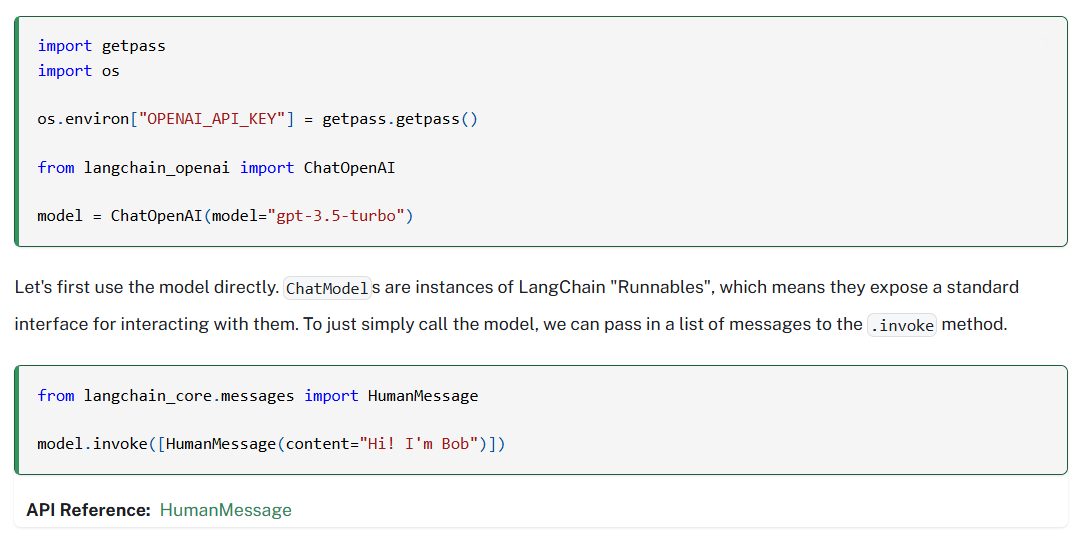

In [1]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = ChatOpenAI(model='gpt-4.1-nano')
model

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000024B4A3C58A0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000024B4A3E4640>, root_client=<openai.OpenAI object at 0x0000024B47AD4610>, root_async_client=<openai.AsyncOpenAI object at 0x0000024B4A3C5960>, model_name='gpt-4.1-nano', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [4]:
ai_message = model.invoke([HumanMessage(content='Hi! I am Bob~')])

In [5]:
ai_message

AIMessage(content='Hello, Bob! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 13, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-Bcnub86GoNuzThHjYSRoOpmkWNvOb', 'finish_reason': 'stop', 'logprobs': None}, id='run-b7eed41a-2226-418e-b267-6d184aaf871a-0', usage_metadata={'input_tokens': 13, 'output_tokens': 16, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
ai_message.content

'Hello, Bob! Nice to meet you. How can I assist you today?'

In [7]:
ai_message_02 = model.invoke('What is my name?')
ai_message_02

AIMessage(content="I'm sorry, but I don't know your name.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcnucZN3mZnxIncTaKmROkcft03uc', 'finish_reason': 'stop', 'logprobs': None}, id='run-0287a8f6-6997-42fd-bfdb-e36b6e62ab1d-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
ai_message_03 = model.invoke([HumanMessage('What is my name?')])
ai_message_03

AIMessage(content="I'm sorry, but I don't know your name.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-Bcnud13EHexHX7EK269j85or5WWRL', 'finish_reason': 'stop', 'logprobs': None}, id='run-19a5eaef-0065-4601-88c8-f121755c1a8e-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
from langchain_core.messages import AIMessage

ai_message_04 = model.invoke(
    [
        HumanMessage(content='Hi! I am Bob.'),
        AIMessage(content='Hello Bob! How can I assist you today?'),
        HumanMessage(content='What is my name?')
    ]
)

In [10]:
ai_message_04

AIMessage(content='Your name is Bob.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 36, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BcnueYO9O2xMHZbouSvPFU95Q3rvv', 'finish_reason': 'stop', 'logprobs': None}, id='run-d8125b49-ca83-459f-b026-6a996375e9ce-0', usage_metadata={'input_tokens': 36, 'output_tokens': 5, 'total_tokens': 41, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [11]:
ai_message_04.content

'Your name is Bob.'

## Message History

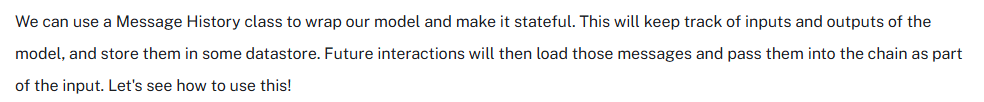

In [12]:
from langchain_core.chat_history import (
    BaseChatMessageHistory,
    InMemoryChatMessageHistory
)
from langchain_core.runnables.history import RunnableWithMessageHistory

store = {}

def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = InMemoryChatMessageHistory()

    return store[session_id]

with_message_history = RunnableWithMessageHistory(model, get_session_history)

In [13]:
config = {'configurable': {'session_id': 'abc2'}}

response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Bob.')],
    config=config
)

response.content

'Hi Bob! Nice to meet you. How can I assist you today?'

In [14]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
    config=config
)

response.content

'Your name is Bob.'

### [문제] 대화 이력(message history)에서 첫 번째 질문(Human Message) 출력

In [15]:
## 대화 이력
get_session_history('abc2')

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Bob.', additional_kwargs={}, response_metadata={}), AIMessage(content='Hi Bob! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 13, 'total_tokens': 28, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcnufWmRUHnVmyLNzcoU2ZiAzlHIj', 'finish_reason': 'stop', 'logprobs': None}, id='run-25d3e3c6-516d-4545-9a1a-8b49391a5b1a-0', usage_metadata={'input_tokens': 13, 'output_tokens': 15, 'total_tokens': 28, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='What is my name?', additional_k

In [16]:
get_session_history('abc2').messages

[HumanMessage(content='Hi! I am Bob.', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hi Bob! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 13, 'total_tokens': 28, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcnufWmRUHnVmyLNzcoU2ZiAzlHIj', 'finish_reason': 'stop', 'logprobs': None}, id='run-25d3e3c6-516d-4545-9a1a-8b49391a5b1a-0', usage_metadata={'input_tokens': 13, 'output_tokens': 15, 'total_tokens': 28, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}),
 

In [17]:
## 첫 번째 질문(HumanMessage) 출력
type(get_session_history('abc2').messages)

list

In [18]:
get_session_history('abc2').messages[0]

HumanMessage(content='Hi! I am Bob.', additional_kwargs={}, response_metadata={})

In [19]:
get_session_history('abc2').messages[0].content

'Hi! I am Bob.'

In [20]:
config = {'configurable': {'session_id': 'abc3'}}

response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
    config=config,
)

response.content

"I'm sorry, but I don't have access to your name. How can I assist you today?"

In [21]:
store

{'abc2': InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Bob.', additional_kwargs={}, response_metadata={}), AIMessage(content='Hi Bob! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 13, 'total_tokens': 28, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcnufWmRUHnVmyLNzcoU2ZiAzlHIj', 'finish_reason': 'stop', 'logprobs': None}, id='run-25d3e3c6-516d-4545-9a1a-8b49391a5b1a-0', usage_metadata={'input_tokens': 13, 'output_tokens': 15, 'total_tokens': 28, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='What is my name?', add

In [22]:
len(store)

2

In [23]:
store.keys()

dict_keys(['abc2', 'abc3'])

In [24]:
get_session_history('abc3')

InMemoryChatMessageHistory(messages=[HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content="I'm sorry, but I don't have access to your name. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 12, 'total_tokens': 31, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BcnuhMo8udaqJGFXFzjNcVLmZjZ1u', 'finish_reason': 'stop', 'logprobs': None}, id='run-5be8d1ee-ff3b-47a7-ae5e-0483ed95b0ca-0', usage_metadata={'input_tokens': 12, 'output_tokens': 19, 'total_tokens': 31, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [25]:
for message in get_session_history('abc3').messages:
    print(message.content)

What is my name?
I'm sorry, but I don't have access to your name. How can I assist you today?


---

## Prompt templates

In [26]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        ('system', 'You are a helpful assistant. '
        'Answer all question to the best of your ability.'),
        MessagesPlaceholder(variable_name='messages')
    ]
)

chain = prompt | model

In [27]:
response = chain.invoke({'messages': [HumanMessage(content='Hi! I am Bob.')]})
response

AIMessage(content='Hello, Bob! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 33, 'total_tokens': 44, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BcnuiQJkvzdhf3FojFd6hwkb29Nkl', 'finish_reason': 'stop', 'logprobs': None}, id='run-4f9872b0-26cb-48f1-80a3-ec57b24184f6-0', usage_metadata={'input_tokens': 33, 'output_tokens': 11, 'total_tokens': 44, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [28]:
len(store)

2

In [29]:
with_message_history = RunnableWithMessageHistory(chain, get_session_history)

config = {"configurable": {"session_id": "abc5"}}

response = with_message_history.invoke(
    [HumanMessage(content="Hi! I'm Jim")],
    config=config,
)

response.content

'Hello Jim! Nice to meet you. How can I assist you today?'

In [30]:
len(store)

3

In [31]:
store.keys()

dict_keys(['abc2', 'abc3', 'abc5'])

In [32]:
get_session_history('abc5')

InMemoryChatMessageHistory(messages=[HumanMessage(content="Hi! I'm Jim", additional_kwargs={}, response_metadata={}), AIMessage(content='Hello Jim! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 31, 'total_tokens': 46, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcnukiwZVpFONPn9qxnkDdkCJXDz4', 'finish_reason': 'stop', 'logprobs': None}, id='run-8807b58f-1686-4ad3-b674-f11c360dbf4d-0', usage_metadata={'input_tokens': 31, 'output_tokens': 15, 'total_tokens': 46, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [33]:
response

AIMessage(content='Hello Jim! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 31, 'total_tokens': 46, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcnukiwZVpFONPn9qxnkDdkCJXDz4', 'finish_reason': 'stop', 'logprobs': None}, id='run-8807b58f-1686-4ad3-b674-f11c360dbf4d-0', usage_metadata={'input_tokens': 31, 'output_tokens': 15, 'total_tokens': 46, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [34]:
with_message_history

RunnableWithMessageHistory(bound=RunnableBinding(bound=RunnableBinding(bound=RunnableLambda(_enter_history), kwargs={}, config={'run_name': 'load_history'}, config_factories=[])
| RunnableBinding(bound=RunnableLambda(_call_runnable_sync), kwargs={}, config={'run_name': 'check_sync_or_async'}, config_factories=[]), kwargs={}, config={'run_name': 'RunnableWithMessageHistory'}, config_factories=[]), kwargs={}, config={}, config_factories=[], get_session_history=<function get_session_history at 0x0000024B49321090>, history_factory_config=[ConfigurableFieldSpec(id='session_id', annotation=<class 'str'>, name='Session ID', description='Unique identifier for a session.', default='', is_shared=True, dependencies=None)])

In [35]:
store['abc5']

InMemoryChatMessageHistory(messages=[HumanMessage(content="Hi! I'm Jim", additional_kwargs={}, response_metadata={}), AIMessage(content='Hello Jim! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 31, 'total_tokens': 46, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcnukiwZVpFONPn9qxnkDdkCJXDz4', 'finish_reason': 'stop', 'logprobs': None}, id='run-8807b58f-1686-4ad3-b674-f11c360dbf4d-0', usage_metadata={'input_tokens': 31, 'output_tokens': 15, 'total_tokens': 46, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [36]:
response = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config=config,
)

response.content

'Your name is Jim.'

In [37]:
get_session_history('abc5')

InMemoryChatMessageHistory(messages=[HumanMessage(content="Hi! I'm Jim", additional_kwargs={}, response_metadata={}), AIMessage(content='Hello Jim! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 31, 'total_tokens': 46, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcnukiwZVpFONPn9qxnkDdkCJXDz4', 'finish_reason': 'stop', 'logprobs': None}, id='run-8807b58f-1686-4ad3-b674-f11c360dbf4d-0', usage_metadata={'input_tokens': 31, 'output_tokens': 15, 'total_tokens': 46, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content="What's my name?", additional_k

In [38]:
for message in get_session_history('abc5').messages:
    print(f'[{message.type.upper()}]: {message.content}')

[HUMAN]: Hi! I'm Jim
[AI]: Hello Jim! Nice to meet you. How can I assist you today?
[HUMAN]: What's my name?
[AI]: Your name is Jim.


In [39]:
get_session_history('abc5').messages

[HumanMessage(content="Hi! I'm Jim", additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello Jim! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 31, 'total_tokens': 46, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcnukiwZVpFONPn9qxnkDdkCJXDz4', 'finish_reason': 'stop', 'logprobs': None}, id='run-8807b58f-1686-4ad3-b674-f11c360dbf4d-0', usage_metadata={'input_tokens': 31, 'output_tokens': 15, 'total_tokens': 46, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content="What's my name?", additional_kwargs={}, response_metadata={}),
 

In [40]:
get_session_history('abc5').messages[0]

HumanMessage(content="Hi! I'm Jim", additional_kwargs={}, response_metadata={})

In [41]:
get_session_history('abc5').messages[0].type

'human'

In [42]:
get_session_history('abc5').messages[0].type.upper()

'HUMAN'

In [43]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. Answer all questions to the best of your ability in {language}.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

chain = prompt | model

response = chain.invoke(
    {"messages": [HumanMessage(content="hi! I'm bob")], "language": "Spanish"}
)

response.content

'¡Hola, Bob! Encantado de conocerte. ¿En qué puedo ayudarte hoy?'

Let's now wrap this more complicated chain in a Message History class. This time, because there are multiple keys in the input, we need to specify the correct key to use to save the chat history.

In [44]:
prompt = ChatPromptTemplate.from_messages([
        ("system","You are a helpful assistant. Answer all questions to the best of your ability in {language}."),
        MessagesPlaceholder(variable_name="messages"),    
])

chain = prompt | model

In [45]:
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history,
    # history_messages_key='messages',
    input_messages_key="messages",
)

config = {"configurable": {"session_id": "abc11"}}

response = with_message_history.invoke(
    {"messages": [HumanMessage(content="hi! I'm todd")], "language": "Spanish"},
    config=config,
)

response.content

'¡Hola, Todd! Mucho gusto en conocerte. ¿En qué puedo ayudarte hoy?'

In [46]:
len(store)

4

In [47]:
get_session_history('abc11')

InMemoryChatMessageHistory(messages=[HumanMessage(content="hi! I'm todd", additional_kwargs={}, response_metadata={}), AIMessage(content='¡Hola, Todd! Mucho gusto en conocerte. ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 33, 'total_tokens': 52, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcnumEx4s4zm9nK2BWiyM3LAhNyKt', 'finish_reason': 'stop', 'logprobs': None}, id='run-32b077dc-a4ca-4022-b871-4853fe900928-0', usage_metadata={'input_tokens': 33, 'output_tokens': 19, 'total_tokens': 52, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [48]:
response = with_message_history.invoke(
    {"messages": [HumanMessage(content="whats my name?")], "language": "Spanish"},
    config=config,
)

response.content

'Tu nombre es Todd.'

In [49]:
get_session_history('abc11')

InMemoryChatMessageHistory(messages=[HumanMessage(content="hi! I'm todd", additional_kwargs={}, response_metadata={}), AIMessage(content='¡Hola, Todd! Mucho gusto en conocerte. ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 33, 'total_tokens': 52, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcnumEx4s4zm9nK2BWiyM3LAhNyKt', 'finish_reason': 'stop', 'logprobs': None}, id='run-32b077dc-a4ca-4022-b871-4853fe900928-0', usage_metadata={'input_tokens': 33, 'output_tokens': 19, 'total_tokens': 52, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='whats my name?', ad

## Managing Conversation History

In [50]:
from langchain_core.messages import SystemMessage, trim_messages

model = ChatOpenAI(model='gpt-4o')

trimmer = trim_messages(
    max_tokens=65,
    strategy="last",
    token_counter=model,
    include_system=True,
    allow_partial=False,
    start_on="human",
)

messages = [
    SystemMessage(content="you're a good assistant"),
    HumanMessage(content="hi! I'm bob"),
    AIMessage(content="hi!"),
    HumanMessage(content="I like vanilla ice cream"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2 + 2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

trimmer.invoke(messages)

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={})]

In [51]:
from langchain_core.messages import SystemMessage, trim_messages

model = ChatOpenAI(model='gpt-4o')

trimmer = trim_messages(
    max_tokens=65,
    strategy="first",
    token_counter=model,
    # include_system=True,
    allow_partial=False,
    # start_on="human",
)

messages = [
    SystemMessage(content="you're a good assistant"),
    HumanMessage(content="hi! I'm bob"),
    AIMessage(content="hi!"),
    HumanMessage(content="I like vanilla ice cream"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2 + 2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

trimmer.invoke(messages)

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 HumanMessage(content="hi! I'm bob", additional_kwargs={}, response_metadata={}),
 AIMessage(content='hi!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='I like vanilla ice cream', additional_kwargs={}, response_metadata={}),
 AIMessage(content='nice', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={})]

In [52]:
from langchain_core.messages import SystemMessage, trim_messages

model = ChatOpenAI(model='gpt-4o')

trimmer = trim_messages(
    max_tokens=65,
    strategy="last",
    token_counter=model,
    include_system=True,
    allow_partial=False,
    # start_on="human",
)

messages = [
    SystemMessage(content="you're a good assistant"),
    HumanMessage(content="hi! I'm bob"),
    AIMessage(content="hi!"),
    HumanMessage(content="I like vanilla ice cream"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2 + 2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

trimmer.invoke(messages)

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 AIMessage(content='nice', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={})]

In [53]:
from langchain_core.messages import SystemMessage, trim_messages

model = ChatOpenAI(model='gpt-4o')

trimmer = trim_messages(
    max_tokens=51,
    strategy="last",
    token_counter=model,
    include_system=True,
    allow_partial=True,
    start_on="human",
)

messages = [
    SystemMessage(content="you're a good assistant"),
    HumanMessage(content="hi! I'm bob"),
    AIMessage(content="hi!"),
    HumanMessage(content="I like vanilla ice cream"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2 + 2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

trimmer.invoke(messages)

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={})]

In [54]:
from langchain_core.messages import SystemMessage, trim_messages

model = ChatOpenAI(model='gpt-4o')

trimmer = trim_messages(
    max_tokens=65,
    strategy="last",
    token_counter=model,
    include_system=True,
    allow_partial=True,
    start_on="human",
)

messages = [
    SystemMessage(content="you're a good assistant"),
    HumanMessage(content="hi! I'm bob"),
    AIMessage(content="hi!"),
    HumanMessage(content="I like vanilla ice cream"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2 + 2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!" ),
]

trim_messages = trimmer.invoke(messages)
trim_messages

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={})]

In [55]:
model.get_num_tokens_from_messages(trim_messages)

52

In [56]:
prompt = ChatPromptTemplate.from_messages([
        ("system",
         "You are a helpful assistant. Answer all questions to the best of your ability in {language}."),
        MessagesPlaceholder(variable_name="messages"),    
])

In [57]:
from operator import itemgetter

dc = {"messages": messages + [HumanMessage(content="what's my name?")],"language": "한국어"}

# result = itemgetter("messages")
# result(dc)

itemgetter("messages")(dc)

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 HumanMessage(content="hi! I'm bob", additional_kwargs={}, response_metadata={}),
 AIMessage(content='hi!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='I like vanilla ice cream', additional_kwargs={}, response_metadata={}),
 AIMessage(content='nice', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content="what's my name?", additional_kwargs={}, response_metadata={})]

In [58]:
from operator import itemgetter
from langchain_core.runnables import RunnablePassthrough

chain = (
    RunnablePassthrough.assign(messages=itemgetter("messages") | trimmer)
    | prompt
    | model
)

response = chain.invoke(
    {
        "messages": messages + [HumanMessage(content="what's my name?")],
        "language": "한국어",
    }
)
response.content

'죄송하지만, 이전 대화를 통해 사용자의 이름을 알 수 없습니다. 어떻게 도와드릴까요?'

In [59]:
response

AIMessage(content='죄송하지만, 이전 대화를 통해 사용자의 이름을 알 수 없습니다. 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 84, 'total_tokens': 107, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BcnurP3rgZ5TFORfQg91Pcu9vj5pa', 'finish_reason': 'stop', 'logprobs': None}, id='run-cbf123e0-2a8f-4416-843a-30320ce64785-0', usage_metadata={'input_tokens': 84, 'output_tokens': 23, 'total_tokens': 107, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [60]:
response.usage_metadata

{'input_tokens': 84,
 'output_tokens': 23,
 'total_tokens': 107,
 'input_token_details': {'audio': 0, 'cache_read': 0},
 'output_token_details': {'audio': 0, 'reasoning': 0}}

In [61]:
response.usage_metadata['total_tokens']

107

In [62]:
current_messages = messages + [HumanMessage(content="what's my name?")]
trimmer.invoke(current_messages)

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content="what's my name?", additional_kwargs={}, response_metadata={})]

In [63]:
response = chain.invoke(
    {
        "messages": messages + [HumanMessage(content="what math problem did i ask")],
        "language": "한국어",
    }
)
response.content

'당신이 물어본 수학 문제는 "2 + 2"였습니다. 답은 4입니다.'

In [64]:
store.keys()

dict_keys(['abc2', 'abc3', 'abc5', 'abc11'])

In [65]:
get_session_history('abc20')

InMemoryChatMessageHistory(messages=[])

In [66]:
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="messages",
)

config = {"configurable": {"session_id": "abc20"}}

response = with_message_history.invoke(
    {
        "messages": messages + [HumanMessage(content="whats my name?")],
        "language": "한국어",
    },
    config=config,
)

response.content

'죄송하지만, 대화 중에서는 사용자의 이름이 무엇인지 알려주신 적이 없습니다. 당신의 이름을 어떻게 부르길 원하시는지 말씀해주시면 기억하도록 하겠습니다.'

In [67]:
store.keys()

dict_keys(['abc2', 'abc3', 'abc5', 'abc11', 'abc20'])

In [68]:
for message in get_session_history('abc20').messages:
    print(f'[{message.type.upper()}]: {message.content}')

[SYSTEM]: you're a good assistant
[HUMAN]: hi! I'm bob
[AI]: hi!
[HUMAN]: I like vanilla ice cream
[AI]: nice
[HUMAN]: whats 2 + 2
[AI]: 4
[HUMAN]: thanks
[AI]: no problem!
[HUMAN]: having fun?
[AI]: yes!
[HUMAN]: whats my name?
[AI]: 죄송하지만, 대화 중에서는 사용자의 이름이 무엇인지 알려주신 적이 없습니다. 당신의 이름을 어떻게 부르길 원하시는지 말씀해주시면 기억하도록 하겠습니다.


In [69]:
response = with_message_history.invoke(
    {
        "messages": [HumanMessage(content="what math problem did i ask?")],
        "language": "한국어",
    },
    config=config,
)

response.content

'죄송하지만, 이전 대화의 내용을 볼 수 없습니다. 어떤 수학 문제를 물어보셨는지 다시 말씀해 주시면 기꺼이 도와드리겠습니다.'

In [70]:
get_session_history('abc20').messages

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 HumanMessage(content="hi! I'm bob", additional_kwargs={}, response_metadata={}),
 AIMessage(content='hi!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='I like vanilla ice cream', additional_kwargs={}, response_metadata={}),
 AIMessage(content='nice', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats my name?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='죄송하지만, 대화 중에서는 사용자의

In [71]:
trimmer.invoke(get_session_history('abc20').messages)

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={})]